In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

In [15]:
data_power = np.load("../data/data_power.npz")
data_total_field = np.load("../data/data_total_field.npz")

### Output power

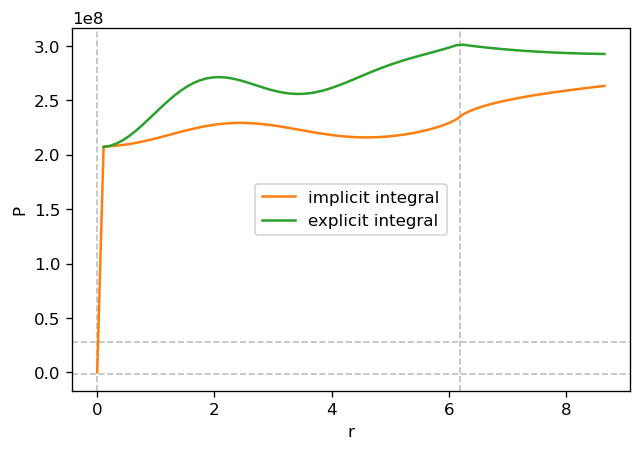

In [16]:
plt.figure(dpi=120)

scattpos = data_power["scattpos"]

for i in range(scattpos.shape[0]):
    plt.axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    plt.axhline(-data_power["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
plt.plot(data_power["r"], data_power["P"], label="implicit integral", color="C1")
plt.plot(data_power["r"], data_power["Pexpl"], label="explicit integral", color="C2")

plt.xlabel("r")
plt.ylabel("P")
plt.legend()

### Total Field

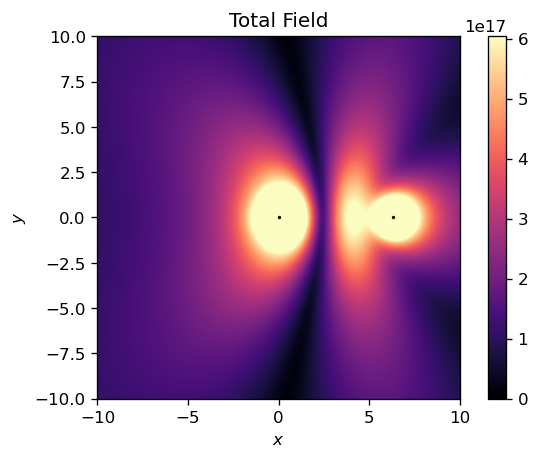

In [10]:
fig, ax = plt.subplots(dpi=120)

scattpos = np.load("../data/data_total_field.npz")["scattpos"]

xx = data_total_field["xx"]
yy = data_total_field["yy"]
phitot = data_total_field["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total Field")

plt.show()